In [1]:
import pandas as pd
import random

In [2]:
import requests
from bs4 import BeautifulSoup

## Telegram

In [3]:
# pip install telethon

In [10]:
from telethon.sync import TelegramClient

name = 'Paige Lee' 
api_id = '13544320' 
api_hash = '1029298096dbdcfc04c3c027a33c5eae' 
chat = 'essentialpoetry'

data = [] # stores all our data in the format SENDER_ID, MSG

async with TelegramClient(name, api_id, api_hash) as client:
    async for message in client.iter_messages(chat):
        data.append({
            'senderUsername' : message.sender.username,
            'date' : message.date,
            'text' : message.text})

In [47]:
df = pd.DataFrame.from_records(data)
print(len(df))
df.head()

1231


,senderUsername,date,text
0,essentialpoetry,2022-09-29 14:14:24+00:00,что за обрубки тут\nмимо тебя плывут?\n​\nэто ...
1,essentialpoetry,2022-09-26 11:47:59+00:00,О медленном золоте нашего дня\nпоет на чугунно...
2,essentialpoetry,2022-09-23 12:51:01+00:00,Я испытываю ужас.\nТы испытываешь ужас.\nОн ис...
3,essentialpoetry,2022-09-22 09:19:54+00:00,Когда неведомо откуда\nвсесокрушающая тьма\nвд...
4,essentialpoetry,2022-09-21 07:35:32+00:00,"Дети-голуби селятся в голубятнях,\nподнимаясь ..."


In [48]:
df['date'] = df['date'].apply(lambda t : t.tz_convert(None))

<AxesSubplot:xlabel='date,date'>

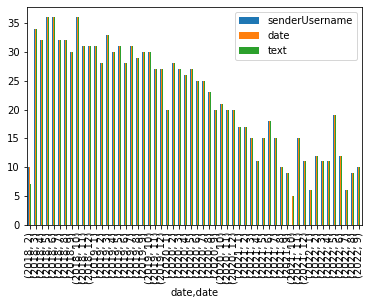

In [49]:
df.groupby([df["date"].dt.year, df["date"].dt.month]).count().plot(kind="bar")

In [61]:
texts = []
authors = []
perevods = []
bad = []

newRecs = []
print(len(data))
for r in data:
    if r['text'] == None or r['text'].strip() == '' or len(r['text'].strip().split('\n')) < 3:
        bad.append(r)
        continue
    if 'перевод' in r['text']:
        # print(r['text'])
        perevods.append(r)
        continue
        
    txt = r['text']
    a = txt.split('\n')[-1]
    t = '\n'.join(txt.split('\n')[:-1])
    
    newRecs.append({
        'date' : f"{r['date'].month}-{r['date'].day}-{r['date'].year}",
        'sender' : r['senderUsername'],
        'author' : a.replace('*',''),
        'text' : t.strip()
    })
print(len(newRecs))
print(len(perevods))

1231
1178
24


In [62]:
random.choice(newRecs)

{'date': '3-11-2020',
 'sender': 'essentialpoetry',
 'author': 'Елена Шварц',
 'text': 'ПРОБУЖДЕНИЕ\n\nДитя проснулось в Вавилоне\nОт перестука сторожей\nИ оттого, что ласточка все стонет\nВ слюне окаменившейся своей.\n\nКак долго длится ночь\n(Но скоро солнце встанет?),\nНад ним вращается такая высота -\nНа слабое мерцающее темя\nГрядущего, кружась, спускается плита.\n\nКак долго длится ночь,\nНо скоро солнце встанет.\nОн плачет оттого, что ласточка и он\nЛежат в осадке и на дне стакана\nИ в непрозрачной глубине времен.\n\nЯ слышу - ящерка по глине прошуршала.\nОткуда я гляжу - со стенки, с потолка?\nА ласточка пронзительнее стонет.\nЗачем же я... Неужто это я\nПроснулась майской ночью в Вавилоне?'}

In [63]:
df = pd.DataFrame.from_records(newRecs)
print(len(df))
df.head()

1178


,date,sender,author,text
0,9-29-2022,essentialpoetry,Александр Беляков,что за обрубки тут\nмимо тебя плывут?\n​\nэто ...
1,9-26-2022,essentialpoetry,Олег Юрьев,О медленном золоте нашего дня\nпоет на чугунно...
2,9-23-2022,essentialpoetry,Виталий Пуханов,Я испытываю ужас.\nТы испытываешь ужас.\nОн ис...
3,9-22-2022,essentialpoetry,Михаил Айзенберг,Когда неведомо откуда\nвсесокрушающая тьма\nвд...
4,9-21-2022,essentialpoetry,Михаил Айзенберг,"Дети-голуби селятся в голубятнях,\nподнимаясь ..."


In [64]:
df.to_excel('essentialpoetryTelegramPosts9-30-2022.xlsx')

## No War Poetry

In [114]:
site = 'https://nowarpoetry.com/authors/'

soup = BeautifulSoup(requests.get(site).content, "html.parser")

In [121]:
hrefs = []
for a in soup.find_all('a')[4:]:
    if a.text == 'WordPress':
        break
    hrefs.append(a['href'])

In [216]:
allPoems = []

for url in hrefs:
    soup = BeautifulSoup(requests.get(url).content, "html.parser")
    for br in soup.find_all("br"):
        br.replace_with("\n")

    poems = []
    ps = soup.find_all('p')
    newpoem = False
    poemlines = []
    for i, p in enumerate(ps):
        text = p.text
        if i == 0:
            author = p.text
            continue
        if p.text.strip() == '':
            continue
        if p.text == 'П О Э Т Ы':
            poems.append(('\n').join(poemlines))
            break
        if p.text[0] == '[' and ']' in p.text:
            print(p.text)
            continue
        if p.strong and poemlines != []:
            poems.append(('\n').join(poemlines))
            newpoem = True
            poemlines = []
            continue
        if ps[i-1].strong and ps[i-1].text.count('/') < 2 and i != 2:
            text = ps[i-1].text + '\n' + p.text
        text = text.replace('/   /   /','')
        poemlines.append(text + '\n')
    
    for poem in poems:
        allPoems.append({
            'Author' : author,
            'Text' : poem,
            'URL' : url,
            'Before or after' : 'After'
        })

[1] Ab ovo — в буквальном переводе «с яйца». Устойчивый фразеологический оборот, обозначающий «с самого начала».
[2] Плутон –в древнегреческой и римской мифологии
одно из имён бога подземного царства и смерти.
[3] Волока — единица измерения площади, равная 30 моргам или 20 десятинам (21,36 га), а также единица обложения в Великом княжестве Литовском.
[4] Морг – единица измерения площади земли в средневековой Западной Европе и, в частности, в Речи Посполитой, равная приблизительно 0,56 гектара.
[5] лат. Sero molunt deorum molae — «Поздно мелют мельницы богов» — крылатое выражение, означающее неотвратимость Судьбы.
[6] «№ 5, 1948» — картина Джексона Поллока, завершённая в 1948 году. Одна из самых известных работ в стиле абстрактного экспрессионизма.
[7] Отсылка к «Пушкин и Гоголь» Даниила Хармса.
[1] Арад — город на юге Израиля
[2] Один — верховный бог в германо-скандинавской мифологии
[3] Па́род (др.-греч. πάροδος) – в древнегреческом театре (трагедии и комедии) хоровая песня, которая и

In [217]:
len(allPoems)

794

In [218]:
random.choice(allPoems)

{'Author': 'АЛЕКСАНДР ДЕЛЬФИНОВ ',
 'Text': 'Война\n\n«Как ни печально признавать, порой война необходима,\nВедь после кризиса опять жизнь расцветёт, – сказал мне Дима. —\nВолна огня очистит почву, начнётся новая весна,\nНа всём плохом поставив точку – вот для чего нужна война!»\nМы с ним в кафе сидели где-то, не помню, в Питере, в Москве,\nНо это точно было лето, и ветерок шуршал в листве,\nИ я представил, как внезапно сметает всё волна огня,\nЗачистив землю поэтапно, и нет ни Димы, ни меня,\nИ только в бункере бетонном на генераторном ходу\nГигантский сервер «Амазона» гудит в густую пустоту.\nПрошла лишь пара-тройка лет,\nИ Димы правда больше нет.\n\nМы все в солдатики играли, мальчишки из СССР,\nИ пленных – нет, не убивали, простите, благородный сэр,\nПозвольте выйти с белым флагом навстречу вражеским войскам,\nВедь честным и лихим воякам почёт и слава тут и там,\nИ после битвы злой и страшной хотим, как водится в игре,\nМы наших обменять на ваших за гаражом на пустыре.\nХоть, помню

In [219]:
nwpDf = pd.DataFrame.from_records(allPoems)
nwpDf.head()

,Author,Text,URL,Before or after
0,АЛЕКСАНДР АМЧИСЛАВСКИЙ,СОЛДАТСКАЯ ПРОЩАЛЬНАЯ\n\nВо сне а будто бы в б...,https://nowarpoetry.com/authors/alexander-amch...,After
1,АЛЕКСАНДР АМЧИСЛАВСКИЙ,Серый лёд ни капли света\nгрязная вода\nотрабо...,https://nowarpoetry.com/authors/alexander-amch...,After
2,АЛЕКСАНДР АМЧИСЛАВСКИЙ,"Боишься, мальчик, сравнивать свой дом\nс могил...",https://nowarpoetry.com/authors/alexander-amch...,After
3,АЛЕКСАНДР АМЧИСЛАВСКИЙ,Нас тьмы и тьмы. И чёрная зима\nлежит раскинул...,https://nowarpoetry.com/authors/alexander-amch...,After
4,АНАСТАСИЯ АНДРЕЕВА,\n\nони не знали что их завтра ждет\nвойна пол...,https://nowarpoetry.com/authors/anastasia-andr...,After


In [220]:
nwpDf.to_excel('Excel_files/No_War_Poetry_9-19.xlsx')